In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
%matplotlib inline
np.random.seed(12)


import keras
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.optimizers import SGD
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
            ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True),TQDMNotebookCallback()]

In [72]:
#read the csv file and drop the unnamed column
df = pd.read_csv('diamonds.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [81]:
#limit price range to $3000
df = df[df.price < 3000]

## Visualizations

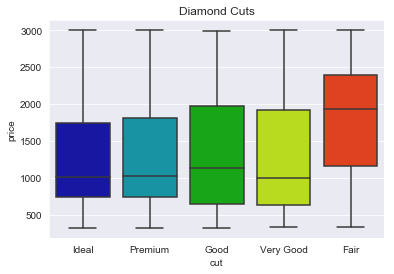

In [88]:
#Diamond Cuts
sns.set_style('darkgrid')
sns.boxplot(y='price',x='cut',data=df,palette = 'nipy_spectral');
plt.title('Diamond Cuts');

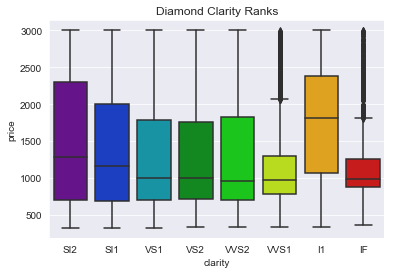

In [89]:
#Diamond Clarity
sns.boxplot(y='price',x='clarity',data=df,palette = 'nipy_spectral');
plt.title('Diamond Clarity Ranks');

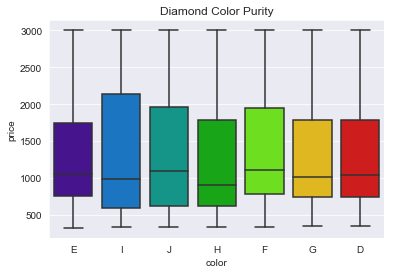

In [90]:
#Diamond Color/Clearness
sns.boxplot(y='price',x='color',data=df,palette = 'nipy_spectral');
plt.title('Diamond Color Purity');

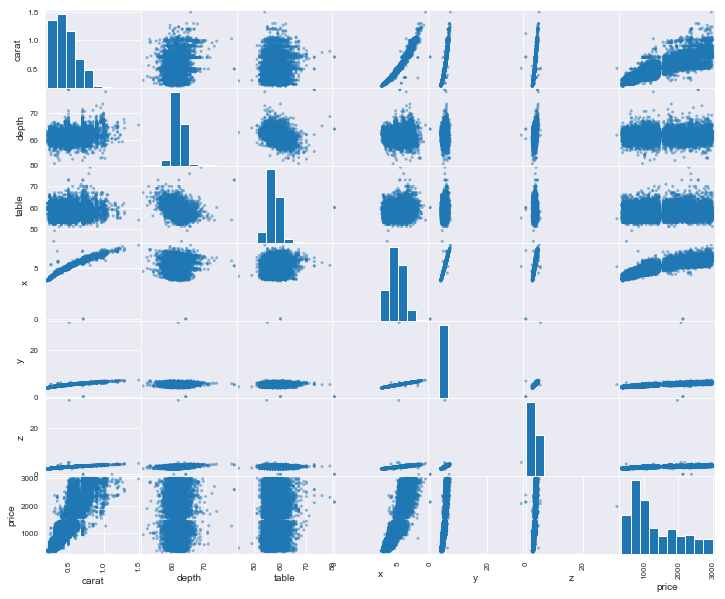

In [107]:
#create a scatter plot of all continuous variables
continuous_var = ['carat','depth','table','x','y','z','price']
pd.plotting.scatter_matrix(df[continuous_var],figsize=(12,10));


In [ ]:
#convert categorical variables to dummy columns
df = pd.get_dummies(df,drop_first=True)

In [4]:
#create X and y dataframes
X = df.drop('price',axis=1)
y = df['price']

In [5]:
#instantiate the min and max scalers
mm = MinMaxScaler()
ss = StandardScaler()

In [6]:
#split the dataset into a train and test and set a split size and random state for reproducability
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

In [7]:
#transform the X train and test with Standard scalers
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [8]:
#instantiate Linear Regression then fit and predict
model = LinearRegression()
model.fit(X_train,y_train)

ytrain_pred = model.predict(X_train)
ytest_pred = model.predict(X_test)

In [9]:
#print out the MSE and R2
print('MSE Train:',mean_squared_error(y_train,ytrain_pred), 'MSE Test:',mean_squared_error(y_test,ytest_pred))
print('R2 Train:',r2_score(y_train,ytrain_pred),'R2 Test:', r2_score(y_test,ytest_pred))

MSE Train: 34937.9500292992 MSE Test: 36777.269233048966
R2 Train: 0.9318507502351661 R2 Test: 0.9281579663289184


In [ ]:
#fit XGBOOST, then predict
clfX = XGBRegressor()
clfX.fit(X_train,y_train, verbose=True)
ytrain_pred = clfX.predict(X_train)
ytest_pred = clfX.predict(X_test)

In [11]:
#print out the MSE and R2
print('MSE Train:',mean_squared_error(y_train,ytrain_pred), 'MSE Test:',mean_squared_error(y_test,ytest_pred))
print('R2 Train:',r2_score(y_train,ytrain_pred),'R2 Test:', r2_score(y_test,ytest_pred))

MSE Train: 25824.791992638882 MSE Test: 27456.563724539013
R2 Train: 0.9496266896553652 R2 Test: 0.9463653659794307


In [12]:
#fit Gradient Boosted Trees, then predict
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
ytrain_pred = gbr.predict(X_train)
ytest_pred = gbr.predict(X_test)

In [13]:
#print out the MSE and R2
#print out the MSE and R2
print('MSE Train:',mean_squared_error(y_train,ytrain_pred), 'MSE Test:',mean_squared_error(y_test,ytest_pred))
print('R2 Train:',r2_score(y_train,ytrain_pred),'R2 Test:', r2_score(y_test,ytest_pred))

MSE Train: 25743.5774961963 MSE Test: 27217.229156715945
R2 Train: 0.9497851049887762 R2 Test: 0.946832890688001


In [14]:
#Random forest with some parameters to stop overfitting, then predict
rf = RandomForestRegressor(n_estimators=100,max_depth=16,max_features=6,min_samples_split=8,min_samples_leaf=6)
rf.fit(X_train,y_train)
ytrain_pred = rf.predict(X_train)
ytest_pred = rf.predict(X_test)


In [15]:
#print out the MSE and R2
print('MSE Train:',mean_squared_error(y_train,ytrain_pred), 'MSE Test:',mean_squared_error(y_test,ytest_pred))
print('R2 Train:',r2_score(y_train,ytrain_pred),'R2 Test:', r2_score(y_test,ytest_pred))

MSE Train: 17174.19139493924 MSE Test: 23586.328922038694
R2 Train: 0.9665003740087422 R2 Test: 0.953925621126008


In [108]:
def graph_loss(history):
    '''
    Graphs the loss and val_loss of the neural network, input is the history variable set equal to model.fit
    '''
    training_loss = history.history['loss']
    test_loss = history.history['val_loss']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize accuracy history
    fig = plt.figure(figsize=(12,8))
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.ylim(top=40000)
    plt.show();

In [109]:
def model1_maker(X_train,y_train,X_test,y_test,epochs):  
    n_cols = X_train.shape[1]

    # Set up the model: Sequential
    model1 = Sequential()

    # Add the first layer
    model1.add(Dense(12,  input_shape=(n_cols,)))
    
    #Add hidden layers
    model1.add(Dense(32,activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=1)))

    model1.add(Dense(64,activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=1),kernel_regularizer=regularizers.l2(0.4) ))
   
    model1.add(Dense(64,activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=1),kernel_regularizer=regularizers.l2(0.3) ))

    model1.add(Dense(64,activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=1),kernel_regularizer=regularizers.l2(0.5) ))
    
    model1.add(Dense(64,activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=1),kernel_regularizer=regularizers.l2(0.4) ))

    model1.add(Dense(32,activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=1)))

    model1.add(Dense(16,activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=1)))

    # Add the output layer
    model1.add(Dense(1))

    #compile and fit model
    model1.compile(optimizer='adam',loss='mean_squared_error')
    history1 = model1.fit(X_train,y_train,epochs=epochs,batch_size=64,validation_data=(X_test,y_test),verbose=2,callbacks=callbacks)
    
    #graph the loss
    graph_loss(history1)
    
    return model1, history1

In [110]:
def model2_maker(X_train,y_train,X_test,y_test,epochs):  
    n_cols = X_train.shape[1]

    # Set up the model: model
    model2 = Sequential()

    # Add the first layer
    model2.add(Dense(32, activation='relu',kernel_initializer = 'uniform', input_shape=(n_cols,)))

    # Add the second layer
    model2.add(Dense(64,kernel_initializer = 'uniform',activation='relu'))

    model2.add(Dense(128,kernel_initializer = 'uniform',activation='relu',kernel_regularizer=regularizers.l2(0.1)))

    model2.add(Dense(64,activation='relu',kernel_initializer = 'uniform'))


    model2.add(Dense(32,activation='relu',kernel_initializer = 'uniform'))

    # Add the output layer
    model2.add(Dense(1))

    model2.compile(optimizer='adam',loss='mean_squared_error')

    history2 = model2.fit(X_train,y_train,epochs=epochs,batch_size=64,validation_data=(X_test, y_test),verbose=2,callbacks=callbacks)
    
    
    graph_loss(history2)
    
    
    return model2, history2

In [47]:
def model3_maker(X_train,y_train,X_test,y_test,epochs):  
    n_cols = X_train.shape[1]

    # Set up the model: model
    model3 = Sequential()

    # Add the first layer
    model3.add(Dense(128, activation='relu',kernel_initializer = keras.initializers.glorot_uniform(seed=1),kernel_regularizer=regularizers.l2(0.3), input_shape=(n_cols,)))

    model3.add(Dense(256,kernel_initializer = keras.initializers.glorot_uniform(seed=1),activation='relu',kernel_regularizer=regularizers.l2(0.3)))

    model3.add(Dense(256,kernel_initializer = keras.initializers.glorot_uniform(seed=1),activation='relu',kernel_regularizer=regularizers.l2(0.3)))

    model3.add(Dense(128,activation='relu',kernel_initializer = keras.initializers.glorot_uniform(seed=1),kernel_regularizer=regularizers.l2(0.3)))

    model3.add(Dense(64,activation='relu',kernel_initializer = keras.initializers.glorot_uniform(seed=1),kernel_regularizer=regularizers.l2(0.3)))


    # Add the output layer
    model3.add(Dense(1))
    model3.compile(optimizer='adam',loss='mean_squared_error')

    history3 = model3.fit(X_train,y_train,epochs=epochs,batch_size=64,validation_data=(X_test, y_test),verbose=2,callbacks=callbacks)
    
    
    graph_loss(history3)
    
    return model3, history3

In [111]:
def model4_maker(X_train,y_train,X_test,y_test,epochs):      
    n_cols = X_train.shape[1]

    # Set up the model: model
    model4 = Sequential()

    # Add the first layer
    model4.add(Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.3) ,kernel_initializer = keras.initializers.glorot_normal(seed=1), input_shape=(n_cols,)))


    model4.add(Dense(32,activation='relu', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))


    model4.add(Dense(64,activation='relu', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))


    model4.add(Dense(128,activation='relu', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))


    model4.add(Dense(64,activation='relu', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))

    model4.add(Dense(32,activation='relu', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))

    model4.add(Dense(16,activation='relu', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))


    # Add the output layer
    model4.add(Dense(1))
    model4.compile(optimizer='adam',loss='mean_squared_error')
    history4 = model4.fit(X_train,y_train,epochs=epochs,batch_size=64,validation_data=(X_test, y_test),verbose=2,callbacks=callbacks)

    
    graph_loss(history4)
    
    return model4, history4

In [112]:
def model5_maker(X_train,y_train,X_test,y_test,epochs):  
    n_cols = X_train.shape[1]

    # Set up the model: model
    model5 = Sequential()

    # Add the first layer
    model5.add(Dense(32,activation='linear',kernel_regularizer=regularizers.l2(0.3) ,kernel_initializer = keras.initializers.glorot_normal(seed=1), input_shape=(n_cols,)))
    model5.add(keras.layers.LeakyReLU(alpha=0.05))

    model5.add(Dense(32,activation='linear', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))
    model5.add(keras.layers.LeakyReLU(alpha=0.05))


    model5.add(Dense(64,activation='linear', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))
    model5.add(keras.layers.LeakyReLU(alpha=0.05))


    model5.add(Dense(128,activation='linear', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))
    model5.add(keras.layers.LeakyReLU(alpha=0.05))


    model5.add(Dense(64,activation='linear', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))
    model5.add(keras.layers.LeakyReLU(alpha=0.05))

    model5.add(Dense(32,activation='linear', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))
    model5.add(keras.layers.LeakyReLU(alpha=0.05))

    model5.add(Dense(16,activation='linear', kernel_initializer = keras.initializers.glorot_normal(seed=1),kernel_regularizer=regularizers.l2(0.3)))
    model5.add(keras.layers.LeakyReLU(alpha=0.05))


    # Add the output layer
    model5.add(Dense(1))
    model5.compile(optimizer='adam',loss='mean_squared_error')
    history5 = model5.fit(X_train,y_train,epochs=epochs,batch_size=64,validation_data=(X_test, y_test),verbose=2,callbacks=callbacks)

    graph_loss(history5)
    
    return model5, history5

In [116]:
def model6_maker(X_train,y_train,X_test,y_test,epochs):     
    n_cols = X_train.shape[1]

    # Set up the model: model
    model6 = Sequential()

    # Add6the first layer
    model6.add(Dense(32, activation='relu',kernel_initializer = keras.initializers.glorot_normal(seed=None), input_shape=(n_cols,)))

    model6.add(Dense(32,kernel_initializer = keras.initializers.glorot_normal(seed=None),activation='relu'))

    model6.add(Dense(64,kernel_initializer = keras.initializers.glorot_normal(seed=None),activation='relu'))

    model6.add(Dense(128,activation='relu',kernel_initializer = keras.initializers.glorot_normal(seed=None),kernel_regularizer=regularizers.l2(0.1)))

    model6.add(Dense(64,kernel_initializer = keras.initializers.glorot_normal(seed=None),activation='relu'))

    model6.add(Dense(32,activation='relu',kernel_initializer = keras.initializers.glorot_normal(seed=None)))

    model6.add(Dense(16,kernel_initializer = keras.initializers.glorot_normal(seed=None),activation='relu'))

    # Add6the output layer
    model6.add(Dense(1))

    model6.compile(optimizer='adam',loss='mean_squared_error')
    history6 = model6.fit(X_train,y_train,epochs=epochs,batch_size=64,validation_data=(X_test, y_test),verbose=2,callbacks=callbacks)
    
    graph_loss(history6)
    
    
    return model6, history6

In [117]:
def ensemble_layer(preds_train,preds_test,y_train,y_test,epochs):
    n_cols = preds_train.shape[1]

    # Set up the model: model
    model_ensemble = Sequential()

    # Add the first layer
    model_ensemble.add(Dense(6, activation='relu',kernel_initializer = keras.initializers.glorot_normal(seed=1), input_shape=(n_cols,)))

    model_ensemble.add(Dense(6,kernel_initializer = keras.initializers.glorot_normal(seed=1),activation='relu'))



    # Add the output layer
    model_ensemble.add(Dense(1))

    model_ensemble.compile(optimizer='adam',loss='mean_squared_error')
    history_ensemble = model_ensemble.fit(preds_train,y_train,epochs=epochs,batch_size=64,
                                          validation_data=(preds_test, y_test),verbose=2,callbacks=callbacks)
    
    graph_loss(history_ensemble)
    
    
    return model_ensemble,history_ensemble

In [118]:
def stack_ensemble(X_train,y_train,X_test,y_test,epochs):
    model1,history1 = model1_maker(X_train,y_train,X_test,y_test,epochs)
    model2,history2 = model2_maker(X_train,y_train,X_test,y_test,epochs)
    model3,history3 = model3_maker(X_train,y_train,X_test,y_test,epochs)
    model4,history4 = model4_maker(X_train,y_train,X_test,y_test,epochs)
    model5,history5 = model5_maker(X_train,y_train,X_test,y_test,epochs)
    model6,history6 = model6_maker(X_train,y_train,X_test,y_test,epochs)
    
    predictions1_train = pd.DataFrame(model1.predict(X_train))
    predictions2_train = pd.DataFrame(model2.predict(X_train))
    predictions3_train = pd.DataFrame(model3.predict(X_train))
    predictions4_train = pd.DataFrame(model4.predict(X_train))
    predictions5_train = pd.DataFrame(model5.predict(X_train))
    predictions6_train = pd.DataFrame(model6.predict(X_train))
    
    predictions1_test= pd.DataFrame(model1.predict(X_test))
    predictions2_test= pd.DataFrame(model2.predict(X_test))
    predictions3_test= pd.DataFrame(model3.predict(X_test))
    predictions4_test= pd.DataFrame(model4.predict(X_test))
    predictions5_test= pd.DataFrame(model5.predict(X_test))
    predictions6_test= pd.DataFrame(model6.predict(X_test))
    
    
    train_preds = pd.concat([predictions1_train,predictions2_train,predictions3_train,predictions4_train,
                        predictions5_train,predictions6_train],axis=1)
    test_preds = pd.concat([predictions1_test,predictions2_test,predictions3_test,predictions4_test,
                        predictions5_test,predictions6_test],axis=1)
    train_preds = ss.fit_transform(train_preds)
    test_preds = ss.transform(test_preds)
    
    model_ensemble, history_ensemble = ensemble_layer(train_preds,test_preds,y_train,y_test,epochs)
    
    return model_ensemble, history_ensemble, train_preds, test_preds

# Run all the models indivdually then together

In [54]:
epochs=120

In [ ]:
model1,history1 = model1_maker(X_train,y_train,X_test,y_test,epochs)    

In [ ]:
model2,history2 = model2_maker(X_train,y_train,X_test,y_test,epochs)

In [ ]:
model3,history3 = model3_maker(X_train,y_train,X_test,y_test,epochs)

In [ ]:
model4,history4 = model4_maker(X_train,y_train,X_test,y_test,epochs)

In [ ]:
model5,history5 = model6_maker(X_train,y_train,X_test,y_test,epochs)

In [ ]:
model6,history6 = model6_maker(X_train,y_train,X_test,y_test,epochs)

In [ ]:
model_ensemble, history_ensemble, train_preds, test_preds = stack_ensemble(X_train,y_train,X_test,y_test,epochs=epochs)

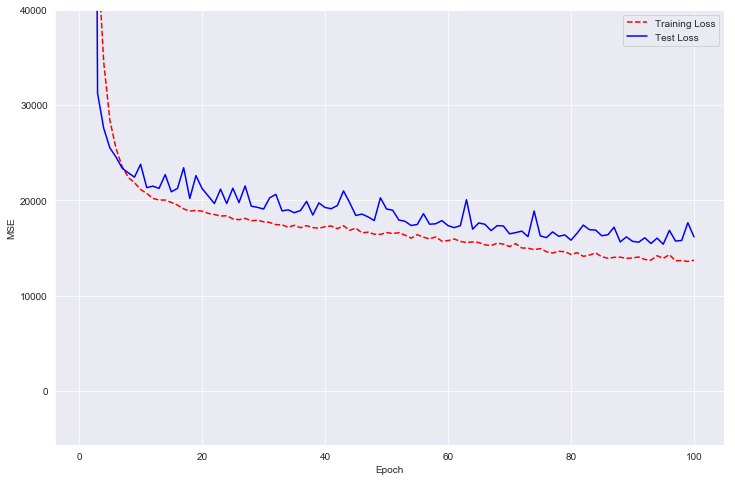

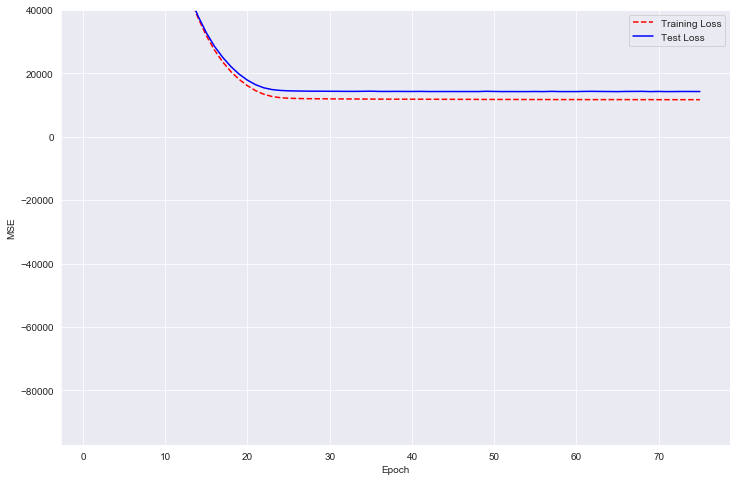

In [126]:
graph_loss(history6)
graph_loss(history_ensemble)

In [64]:
#predict with the stacked network
y_train_preds = model_ensemble.predict(train_preds)
y_test_preds = model_ensemble.predict(test_preds)

In [67]:
#ensembled models MSE and R2
print('MSE Train:',mean_squared_error(y_train,y_train_preds), 'MSE Test:',mean_squared_error(y_test,y_test_preds))
print('R2 Train:',r2_score(y_train,y_train_preds),'R2 Test:', r2_score(y_test,y_test_preds))

MSE Train: 11693.375488726837 MSE Test: 14254.751745834148
R2 Train: 0.9771911412630978 R2 Test: 0.9721542578812009


In [ ]:
model_ensemble.save('model_ensemble.h5')